Spring 2021
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

CIE 555, Neural Networks and Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center">Lab 7</h3>
<h1 align="center">Convolutional Neural Networks: Part II</h3>
<h3 align="center">Shahd Seddik</h3>

---

Hazem Khairy

201700796

# Importing Dataset

#### Downloading file from drive

In [ ]:
# Import PyDrive and associated libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
file_id = '1JNOf33sRfpG2xsV2ULSZ5638eBBQRKBn'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('archive.zip')

#### File Organization

In [ ]:
# Unzipping
!unzip -q /content/archive.zip -d /content

In [ ]:
# moving the content one directory up
!mv /content/Fish_Dataset/Fish_Dataset/* /content/Fish_Dataset/

In [ ]:
# removing the unnecessary directory
!rmdir /content/Fish_Dataset/Fish_Dataset/

In [ ]:
# Removing README file and other stuff
!rm /content/Fish_Dataset/*

rm: cannot remove '/content/Fish_Dataset/Black Sea Sprat': Is a directory
rm: cannot remove '/content/Fish_Dataset/Gilt-Head Bream': Is a directory
rm: cannot remove '/content/Fish_Dataset/Hourse Mackerel': Is a directory
rm: cannot remove '/content/Fish_Dataset/Red Mullet': Is a directory
rm: cannot remove '/content/Fish_Dataset/Red Sea Bream': Is a directory
rm: cannot remove '/content/Fish_Dataset/Sea Bass': Is a directory
rm: cannot remove '/content/Fish_Dataset/Shrimp': Is a directory
rm: cannot remove '/content/Fish_Dataset/Striped Red Mullet': Is a directory
rm: cannot remove '/content/Fish_Dataset/Trout': Is a directory


Adjusting the classes
* Removing the GT folder
* Moving content one directory up
* Removing unnecessary files: README, segmentation stuff

In [ ]:
import os
import shutil

In [ ]:
dataset_path = "/content/Fish_Dataset"

# loop over classes directories
for direc_name in os.listdir(dataset_path):
  # current class directory
  current_direc = os.path.join(dataset_path, direc_name)
  # remove the segmentation folder
  useless_GT = os.path.join(current_direc, direc_name + " GT")
  if os.path.exists(useless_GT):
    shutil.rmtree(useless_GT)
  # move one directory up
  images_direc = os.path.join(current_direc, direc_name)
  for file_name in os.listdir(images_direc):
    file_path = os.path.join(images_direc, file_name)
    shutil.move(file_path, current_direc)
  # remove the redundant directory name
  os.rmdir(images_direc)

In [ ]:
# removing unnecessary files
for name in os.listdir("/content"):
  if name != "Fish_Dataset" and name != "sample_data" and name != ".config":
    os.remove(os.path.join("/content", name))

In [ ]:
for name in os.listdir("/content"):
  print(name)

.config
Fish_Dataset
sample_data


## Displaying data and the classes

In [ ]:
import numpy as np

In [ ]:
# displaying the Categories:
print("The categories are: ")
for class_directory in os.listdir("/content/Fish_Dataset"):
  print(class_directory)

The categories are: 
Shrimp
Red Mullet
Red Sea Bream
Trout
Sea Bass
Gilt-Head Bream
Striped Red Mullet
Hourse Mackerel
Black Sea Sprat


Sampling 3 images per class

In [ ]:
# Sampling 3 images per class
sample_images = []
sample_label = []
for class_directory in os.listdir("/content/Fish_Dataset"):
  # get the label
  sample_label.append(class_directory)
  sample_label.append(class_directory)
  sample_label.append(class_directory)

  class_directory_path = os.path.join("/content/Fish_Dataset", class_directory)
  # get the list of images from current dir
  current_dir_images = os.listdir(class_directory_path)
  # sample 3 random images
  images = np.random.choice(current_dir_images, 3)
  # get the image path by appending the parent directory 
  images = list(map(lambda x: os.path.join(class_directory_path, x), images))
  # add to the list
  sample_images.extend(images)

Dispalying:
* Each Row represents a class
* Each class has 3 samples

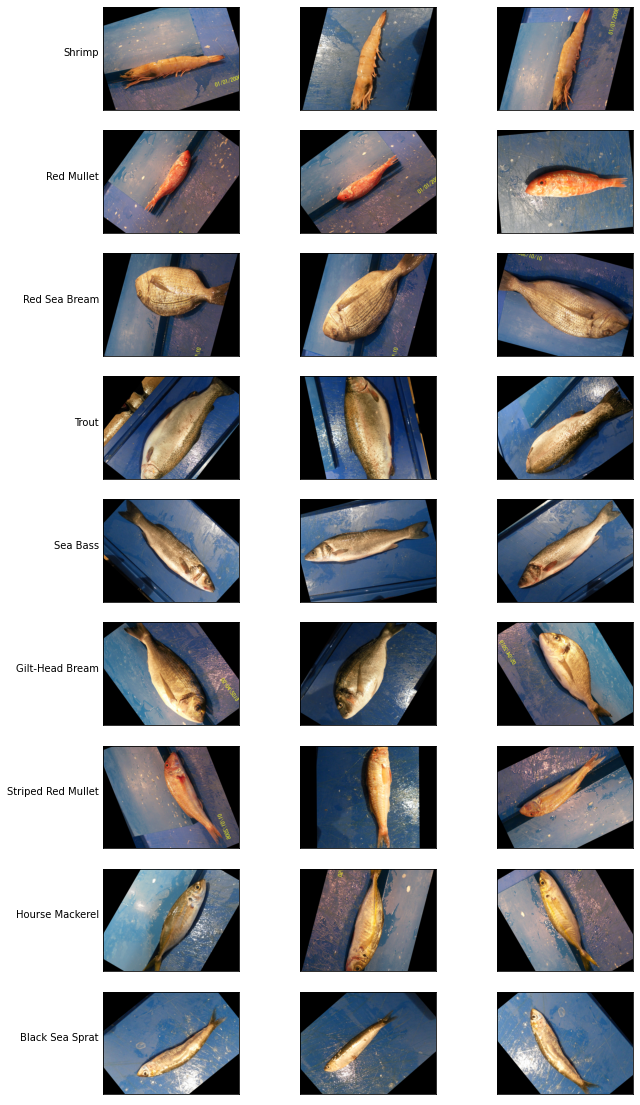

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plot the 27 images
plt.figure(figsize=(10,20))
for index, image in enumerate(sample_images):
    plt.subplot(9, 3, index + 1)
    image = mpimg.imread(sample_images[index]) # Read image from disk
    plt.imshow(image)
    if index%3 == 0:
      plt.ylabel(sample_label[index], rotation = 0, ha="right")
    plt.xticks([])
    plt.yticks([])
plt.show()

# Creating Generator for Data
We will do the following steps:
1. Create a Dataframe of image labels and paths
2. Performing Train/Test split
3. Creating 2 instances of Keras Image generator which loads from Dataframe

### 1. Creating a Dataframe for the dataset

Create 2 lists
* One for paths
* One for the labels

In [ ]:
paths = []
labels = []

for class_directory in os.listdir("/content/Fish_Dataset"):
  class_directory_path = os.path.join("/content/Fish_Dataset", class_directory)
  # get the list of absolute paths in the directory
  class_paths = os.listdir(class_directory_path)
  class_paths = list(map(lambda x: os.path.join(class_directory_path,x), class_paths))
  # get the list of labels. Note:  [1] * 3 returns [1,1,1]. 
  class_labels = [class_directory] * len(class_paths) # this is to make the labels list as long as paths list

  paths.extend(class_paths)
  labels.extend(class_labels)

In [ ]:
print(paths[:2])
print(labels[:2])

['/content/Fish_Dataset/Shrimp/00368.png', '/content/Fish_Dataset/Shrimp/00257.png']
['Shrimp', 'Shrimp']


Create a Dataframe out of these 2 lists

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame.from_dict({"paths":paths,
                   "labels":labels})
df.head()

,paths,labels
0,/content/Fish_Dataset/Shrimp/00368.png,Shrimp
1,/content/Fish_Dataset/Shrimp/00257.png,Shrimp
2,/content/Fish_Dataset/Shrimp/00408.png,Shrimp
3,/content/Fish_Dataset/Shrimp/00215.png,Shrimp
4,/content/Fish_Dataset/Shrimp/00308.png,Shrimp


### 2. Performing train/test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 0)
print("Training dataframe shape:", train_df.shape)
print("Testing dataframe shape:", test_df.shape)

Training dataframe shape: (7200, 2)
Testing dataframe shape: (1800, 2)


### 3. Creating Image Generators

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
WIDTH = 224
HEIGHT = 224
VAL_SPLIT = 0.2
BATCH_SIZE = 64

#### Training/Validation data

In [ ]:
# create ImageDataGenerator instance
train_Dataset = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.4,
    brightness_range = [0.85, 1.15],
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range=20,
    validation_split = VAL_SPLIT        
)

In [ ]:
# create Training data generator
train_generator = train_Dataset.flow_from_dataframe(
    train_df,
    x_col = "paths",
    y_col = "labels",
    target_size = (HEIGHT, WIDTH),
    batch_size = BATCH_SIZE,
    color_mode = "rgb",
    class_mode = "categorical",
    shuffle = True,
    seed = 1,
    subset = "training"
)

Found 5760 validated image filenames belonging to 9 classes.


In [ ]:
# creating the Validation data generator
val_generator = train_Dataset.flow_from_dataframe(
    train_df,
    x_col = "paths",
    y_col = "labels",
    target_size = (HEIGHT, WIDTH),
    batch_size = BATCH_SIZE,
    color_mode = "rgb",
    class_mode = "categorical",
    shuffle = True,
    seed = 1,
    subset = "validation"
)

Found 1440 validated image filenames belonging to 9 classes.


#### Test Data

In [ ]:
test_dataset = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input)

In [ ]:
test_generator = test_dataset.flow_from_dataframe(test_df,
                                                  x_col = "paths",
                                                  y_col = "labels",
                                                  target_size=(HEIGHT, WIDTH), 
                                                  batch_size=BATCH_SIZE,
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  shuffle = False)
                                                  

Found 1800 validated image filenames belonging to 9 classes.


Disaplying the classes Names

In [ ]:
test_generator.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

# VGG19 model

#### Importing basemodel with Imagenet weights

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization

In [ ]:
base_model = VGG19(include_top=False,
                   weights = "imagenet",
                   input_shape = (HEIGHT, WIDTH,3))
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Only setting the FC layers to be trainable, compiling the model, then training

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(base_model.layers[-1].output)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_initializer="he_uniform")(x)
x = BatchNormalization()(x)
x = Dense(32, activation = "relu", kernel_initializer="he_uniform")(x)
x = BatchNormalization()(x)
output = Dense(9, activation='softmax')(x)

model_vgg = Model(inputs = base_model.inputs, outputs = output)
# Print summary
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model_vgg.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=)
hist_vgg = model_vgg.fit(train_generator,
                           validation_data = val_generator,
                           epochs = 5)

Epoch 1/5
90/90 [==============================] - 194s 2s/step - loss: 0.4990 - accuracy: 0.8627 - val_loss: 0.1598 - val_accuracy: 0.9500
Epoch 2/5
90/90 [==============================] - 195s 2s/step - loss: 0.1663 - accuracy: 0.9568 - val_loss: 0.0831 - val_accuracy: 0.9750
Epoch 3/5
90/90 [==============================] - 198s 2s/step - loss: 0.0981 - accuracy: 0.9760 - val_loss: 0.0476 - val_accuracy: 0.9882
Epoch 4/5
90/90 [==============================] - 198s 2s/step - loss: 0.0686 - accuracy: 0.9819 - val_loss: 0.0445 - val_accuracy: 0.9861
Epoch 5/5
90/90 [==============================] - 197s 2s/step - loss: 0.0613 - accuracy: 0.9816 - val_loss: 0.0304 - val_accuracy: 0.9924


In [ ]:
# saving the model
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_vgg.save("/content/gdrive/MyDrive/My year 4/Spring 2021/DL/vgg19_Lab7_model")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/My year 4/Spring 2021/DL/vgg19_Lab7_model/assets


<img src = "https://i.kym-cdn.com/entries/icons/facebook/000/006/151/ObamaNotBad.jpg">

##### VERY IMPRESSIVE OMG!!!
I didn't think it was THAT GOOD. 99% in just 5 epochs. God bless transfer learning

In [ ]:
import matplotlib.pyplot as plt

#### Plotting Accuracies and Losses

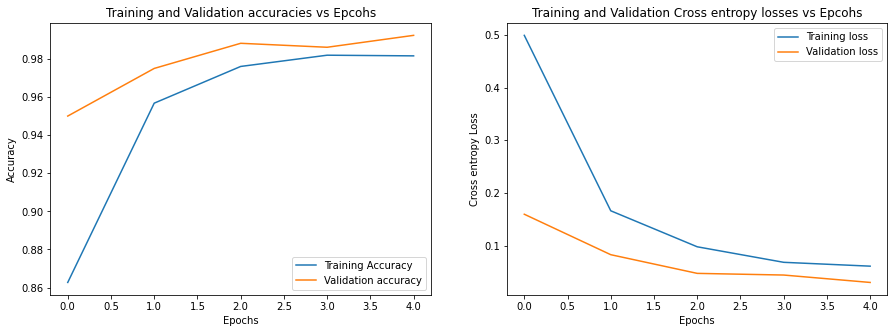

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1);
plt.plot(hist_vgg.history["accuracy"]);
plt.plot(hist_vgg.history["val_accuracy"]);
plt.legend(["Training Accuracy", "Validation accuracy"]);
plt.xlabel("Epochs");
plt.ylabel("Accuracy");
plt.title("Training and Validation accuracies vs Epcohs");

plt.subplot(1,2,2);
plt.plot(hist_vgg.history["loss"]);
plt.plot(hist_vgg.history["val_loss"]);
plt.legend(["Training loss", "Validation loss"]);
plt.xlabel("Epochs");
plt.ylabel("Cross entropy Loss");
plt.title("Training and Validation Cross entropy losses vs Epcohs");

#### Test set performance

Accruacy score

In [ ]:
model_vgg.evaluate(test_generator)

29/29 [==============================] - 24s 799ms/step - loss: 0.0035 - accuracy: 0.9994


[0.003496654564514756, 0.9994444251060486]

Confusion matrix

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
import numpy as np
import seaborn as sb

In [ ]:
preds = np.argmax(model_vgg.predict(test_generator), axis = 1)

In [ ]:
preds[:10]

array([5, 3, 2, 2, 3, 8, 3, 2, 6, 4])

In [ ]:
test_generator.classes[:10]

[5, 3, 2, 2, 3, 8, 3, 2, 6, 4]

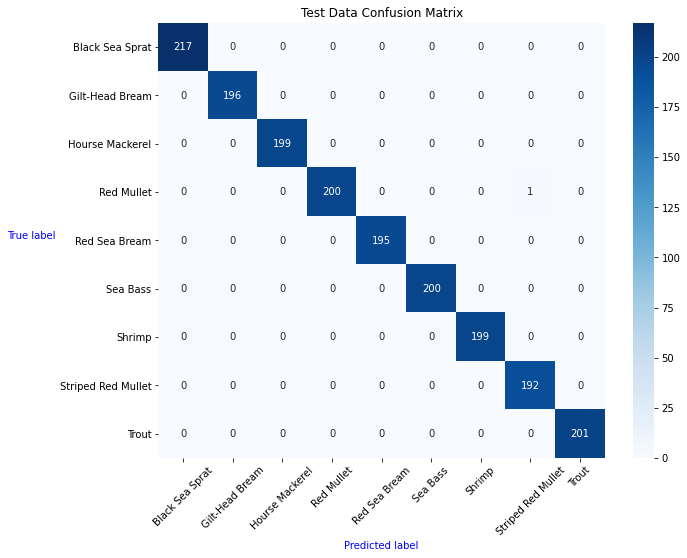

In [ ]:
plt.figure(figsize = (10,8))
sb.heatmap(confusion_matrix(test_generator.classes, preds), 
           xticklabels=test_generator.class_indices, 
           yticklabels=test_generator.class_indices,
           annot = True,
           fmt = "d",
           cmap = sb.color_palette("Blues", as_cmap=True));
plt.xticks(rotation = 45);
plt.ylabel("True label", ha="right", rotation = 0, color = "blue");
plt.xlabel("Predicted label", color = "blue");
plt.title("Test Data Confusion Matrix");

# WOW , just WOW
<img src = "https://www.meme-arsenal.com/memes/ff5bd0519672c2361cbf83bc58b4688b.jpg" width = 200>

Note:

It might seem now that some of the file cleaning procedures are not necessary. I could've just collected the paths of the needed files, and that's it, no need to delete the other files <br>

I didn't know back then that it would be that easy, that's why I cleaned the directories thoroughly, just in case.